In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, balanced_accuracy_score, precision_score, recall_score,matthews_corrcoef

In [19]:
df = pd.read_csv("diabetes.csv")

In [20]:
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [21]:
df.drop(columns=['location'], inplace=True)
df['weight']= df['weight']*0.453592
df['height']=df['height']* 0.0254

In [22]:
def describe(df):
    summary_data = []
    
    for column in df.columns:
        variable = column
        dtype = df[column].dtype
        count = len(df[column])
        unique = len(df[column].unique())
        missing = df[column].isna().sum()
        
        if dtype in ['float64', 'int64']:
            min_val, max_val = df[column].min(), df[column].max()
        else:
            min_val, max_val = 'Str', 'Str'
        
        summary_data.append([variable, dtype, count, unique, missing, min_val, max_val])
    
    output_columns = ['variable', 'dtype', 'count', 'unique', 'missing value', 'Min', 'Max']
    output = pd.DataFrame(summary_data, columns=output_columns)
    
    return output

main = describe(df)
main

,variable,dtype,count,unique,missing value,Min,Max
0,id,int64,403,403,0,1000,41756
1,chol,float64,403,155,1,78.0,443.0
2,stab.glu,int64,403,116,0,48,385
3,hdl,float64,403,78,1,12.0,120.0
4,ratio,float64,403,70,1,1.5,19.299999
5,glyhb,float64,403,240,13,2.68,16.110001
6,age,int64,403,68,0,19,92
7,gender,object,403,2,0,Str,Str
8,height,float64,403,23,5,1.3208,1.9304
9,weight,float64,403,141,1,44.905608,147.4174


In [23]:
df2 = df.dropna(subset=['chol', 'hdl', 'ratio', 'weight', 'waist', 'height', 'hip', 'time.ppn', 'glyhb', 'bp.1s', 'bp.1d'])

In [24]:
df2["outcome"] = df2.glyhb >= 6.5
df2["outcome"] = df2["outcome"].astype(int)
df2

,id,chol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,outcome
0,1000,203.0,82,56.0,3.6,4.310000,46,female,1.5748,54.884632,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0,0
1,1001,165.0,97,24.0,6.9,4.440000,29,female,1.6256,98.883056,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0,0
2,1002,228.0,92,37.0,6.2,4.640000,58,female,1.5494,116.119552,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0,0
3,1003,78.0,93,12.0,6.5,4.630000,67,male,1.7018,53.977448,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0,0
4,1005,249.0,90,28.0,8.9,7.720000,64,male,1.7272,83.007336,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,41503,301.0,90,118.0,2.6,4.280000,89,female,1.5494,52.163080,medium,218.0,90.0,238.0,90.0,31.0,41.0,210.0,0
398,41506,296.0,369,46.0,6.4,16.110001,53,male,1.7526,78.471416,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0,1
399,41507,284.0,89,54.0,5.3,4.390000,51,female,1.6002,69.853168,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0,0
400,41510,194.0,269,38.0,5.1,13.630000,29,female,1.7526,75.749864,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0,1


In [25]:
df2.drop(columns=['glyhb', 'bp.2s', 'bp.2d'], inplace=True)
df2['gender_encoded'] = df2['gender'].apply(lambda x: 1 if x.lower() == 'female' else 0)
df2.drop(columns=['gender'], inplace=True)

In [26]:
from kmodes.kmodes import KModes
df_missing_frame = df2[df2['frame'].isnull()]
df_with_frame = df2[~df2['frame'].isnull()]

# Apply K-Modes clustering on the data with complete 'frame' values
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(df_with_frame.drop('frame', axis=1))

# Assign each cluster a mode value for the 'frame' column
cluster_modes = df_with_frame.assign(Cluster=clusters).groupby('Cluster')['frame'].agg(lambda x: pd.Series.mode(x)[0])

# Predict clusters for the data with missing 'frame' values
predicted_clusters = km.predict(df_missing_frame.drop('frame', axis=1))

# Impute missing 'frame' values based on the mode 'frame' value of each cluster
df_missing_frame['frame'] = np.array([cluster_modes[cluster] for cluster in predicted_clusters])

# Combine the data back together
imputed_data = pd.concat([df_with_frame, df_missing_frame], sort=False)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 79, cost: 4310.0
Run 1, iteration: 2/100, moves: 16, cost: 4310.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 74, cost: 4278.0
Run 2, iteration: 2/100, moves: 6, cost: 4278.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 79, cost: 4324.0
Run 3, iteration: 2/100, moves: 14, cost: 4324.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 73, cost: 4269.0
Run 4, iteration: 2/100, moves: 25, cost: 4253.0
Run 4, iteration: 3/100, moves: 7, cost: 4253.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 84, cost: 4253.0
Run 5, iteration: 2/100, moves: 12, cost: 4249.0
Run 5, iteration: 3/100, moves: 3, cost: 4249.0
Best run was nu

In [31]:
imputed_data

,id,chol,stab.glu,hdl,ratio,age,bp.1s,bp.1d,waist,hip,time.ppn,outcome,gender_encoded,bmi,large,medium,small
0,1000,203.0,82,56.0,3.6,46,118.0,59.0,29.0,38.0,720.0,0,1,22.130944,0,1,0
1,1001,165.0,97,24.0,6.9,29,112.0,68.0,46.0,48.0,360.0,0,1,37.419200,1,0,0
2,1002,228.0,92,37.0,6.2,58,190.0,92.0,49.0,57.0,180.0,0,1,48.370241,1,0,0
3,1003,78.0,93,12.0,6.5,67,110.0,50.0,33.0,38.0,480.0,0,0,18.637828,1,0,0
4,1005,249.0,90,28.0,8.9,64,138.0,80.0,44.0,41.0,300.0,1,0,27.824747,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,15827,205.0,83,42.0,4.9,72,170.0,90.0,39.0,47.0,240.0,0,1,34.010325,0,1,0
282,20279,147.0,78,42.0,3.5,23,127.0,71.0,43.0,47.0,600.0,0,1,34.955057,0,1,0
332,21284,134.0,101,36.0,3.7,25,142.0,78.0,47.0,58.0,10.0,0,1,43.399321,0,1,0
348,21357,122.0,82,43.0,2.8,36,110.0,80.0,41.0,45.0,90.0,0,1,25.523037,0,1,0


In [28]:
imputed_data.loc[:, 'bmi'] = (imputed_data['weight'] / imputed_data['height']**2)
imputed_data.drop(columns=['weight', 'height'], inplace=True)

In [29]:
imputed_data['outcome'].value_counts()

0    312
1     63
Name: outcome, dtype: int64

In [30]:
frame_dummies = pd.get_dummies(imputed_data['frame'])
imputed_data = pd.concat([imputed_data, frame_dummies], axis=1)
imputed_data.drop('frame', axis=1, inplace=True)

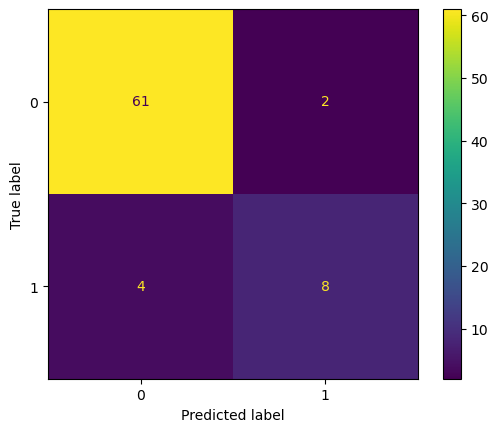

Initial Validation Accuracy: 0.9200
Precision:  0.8
Recall:  0.6666666666666666
F-1:  0.7272727272727272
Balanced accuracy:  0.8174603174603174
Matthews Correlation Coefficient: 0.6847367880174606


In [61]:
import joblib
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
X = imputed_data.drop(columns = ['id','outcome']).copy()
y = imputed_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Validation Accuracy: {accuracy:.4f}')
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)
f1 = f1_score(y_test, y_pred)
print("F-1: ", f1)
bal_acc=balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy: ", bal_acc)
mcc = matthews_corrcoef(y_test, y_pred)
print('Matthews Correlation Coefficient:', mcc)


Accuracy - Cross-Validation Mean: 0.9040, Standard Deviation: 0.0309
F1 - Cross-Validation Mean: 0.6940, Standard Deviation: 0.1010
Precision - Cross-Validation Mean: 0.7600, Standard Deviation: 0.1259
Recall - Cross-Validation Mean: 0.6513, Standard Deviation: 0.1149
Balanced_accuracy - Cross-Validation Mean: 0.8032, Standard Deviation: 0.0591


In [62]:
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
print(y_pred)
np.round(y_pred_proba, 4)

[0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


array([9.200e-03, 9.000e-04, 3.420e-02, 1.207e-01, 3.700e-03, 1.000e-04,
       1.100e-03, 1.890e-02, 1.600e-03, 1.800e-02, 9.658e-01, 3.080e-01,
       9.578e-01, 9.738e-01, 6.700e-03, 6.000e-03, 5.600e-03, 5.877e-01,
       6.000e-04, 6.000e-02, 2.621e-01, 1.800e-03, 8.500e-03, 3.400e-03,
       2.000e-04, 7.000e-04, 3.250e-02, 2.910e-02, 3.000e-04, 5.000e-04,
       6.000e-03, 5.000e-04, 9.153e-01, 9.736e-01, 5.416e-01, 5.000e-04,
       4.000e-04, 6.800e-03, 6.584e-01, 7.500e-03, 4.000e-04, 3.088e-01,
       5.290e-02, 1.943e-01, 7.000e-04, 2.800e-03, 1.500e-03, 6.000e-04,
       4.400e-03, 1.100e-03, 8.700e-03, 4.000e-04, 3.608e-01, 1.718e-01,
       3.300e-03, 2.100e-03, 9.937e-01, 6.000e-03, 9.946e-01, 2.006e-01,
       2.510e-02, 4.000e-04, 3.400e-03, 2.500e-03, 1.000e-02, 7.000e-04,
       5.000e-04, 4.945e-01, 3.131e-01, 2.200e-03, 5.010e-02, 2.100e-02,
       1.200e-03, 2.000e-04, 3.200e-03], dtype=float32)

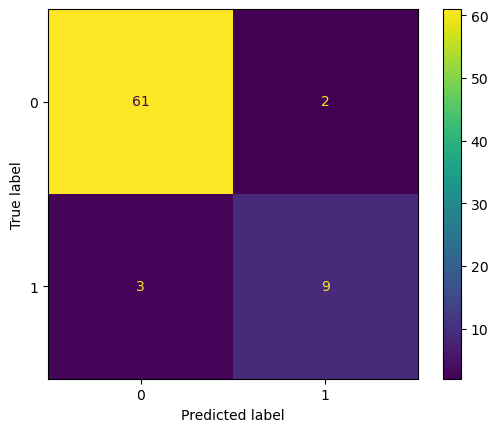

Initial Validation Accuracy: 0.9333
Precision:  0.8181818181818182
Recall:  0.75
F-1:  0.7826086956521738
Balanced accuracy:  0.8591269841269842
Matthews Correlation Coefficient: 0.7443078549232387


In [63]:
threshold = 0.45  # Example threshold

y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
cm = confusion_matrix(y_test, y_pred_custom_threshold, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()
accuracy = accuracy_score(y_test, y_pred_custom_threshold)
print(f'Initial Validation Accuracy: {accuracy:.4f}')
precision = precision_score(y_test, y_pred_custom_threshold)
print("Precision: ", precision)
recall = recall_score(y_test, y_pred_custom_threshold)
print("Recall: ", recall)
f1 = f1_score(y_test, y_pred_custom_threshold)
print("F-1: ", f1)
bal_acc=balanced_accuracy_score(y_test, y_pred_custom_threshold)
print("Balanced accuracy: ", bal_acc)
mcc = matthews_corrcoef(y_test, y_pred_custom_threshold)
print('Matthews Correlation Coefficient:', mcc)


In [ ]:
from sklearn.model_selection import cross_val_score
xgb = XGBClassifier(random_state=42)

cv_results = {}

scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'balanced_accuracy']


for metric in scoring_metrics:
    cv_scores = cross_val_score(xgb, X, y, cv=5, scoring=metric)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    cv_results[metric] = (cv_mean, cv_std)

for metric, (mean, std) in cv_results.items():
    print(f'{metric.capitalize()} - Cross-Validation Mean: {mean:.4f}, Standard Deviation: {std:.4f}')